In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('KNN_Project_Data', index_col=0)

In [3]:
df.head()

,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
XVPM,,,,,,,,,,
1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


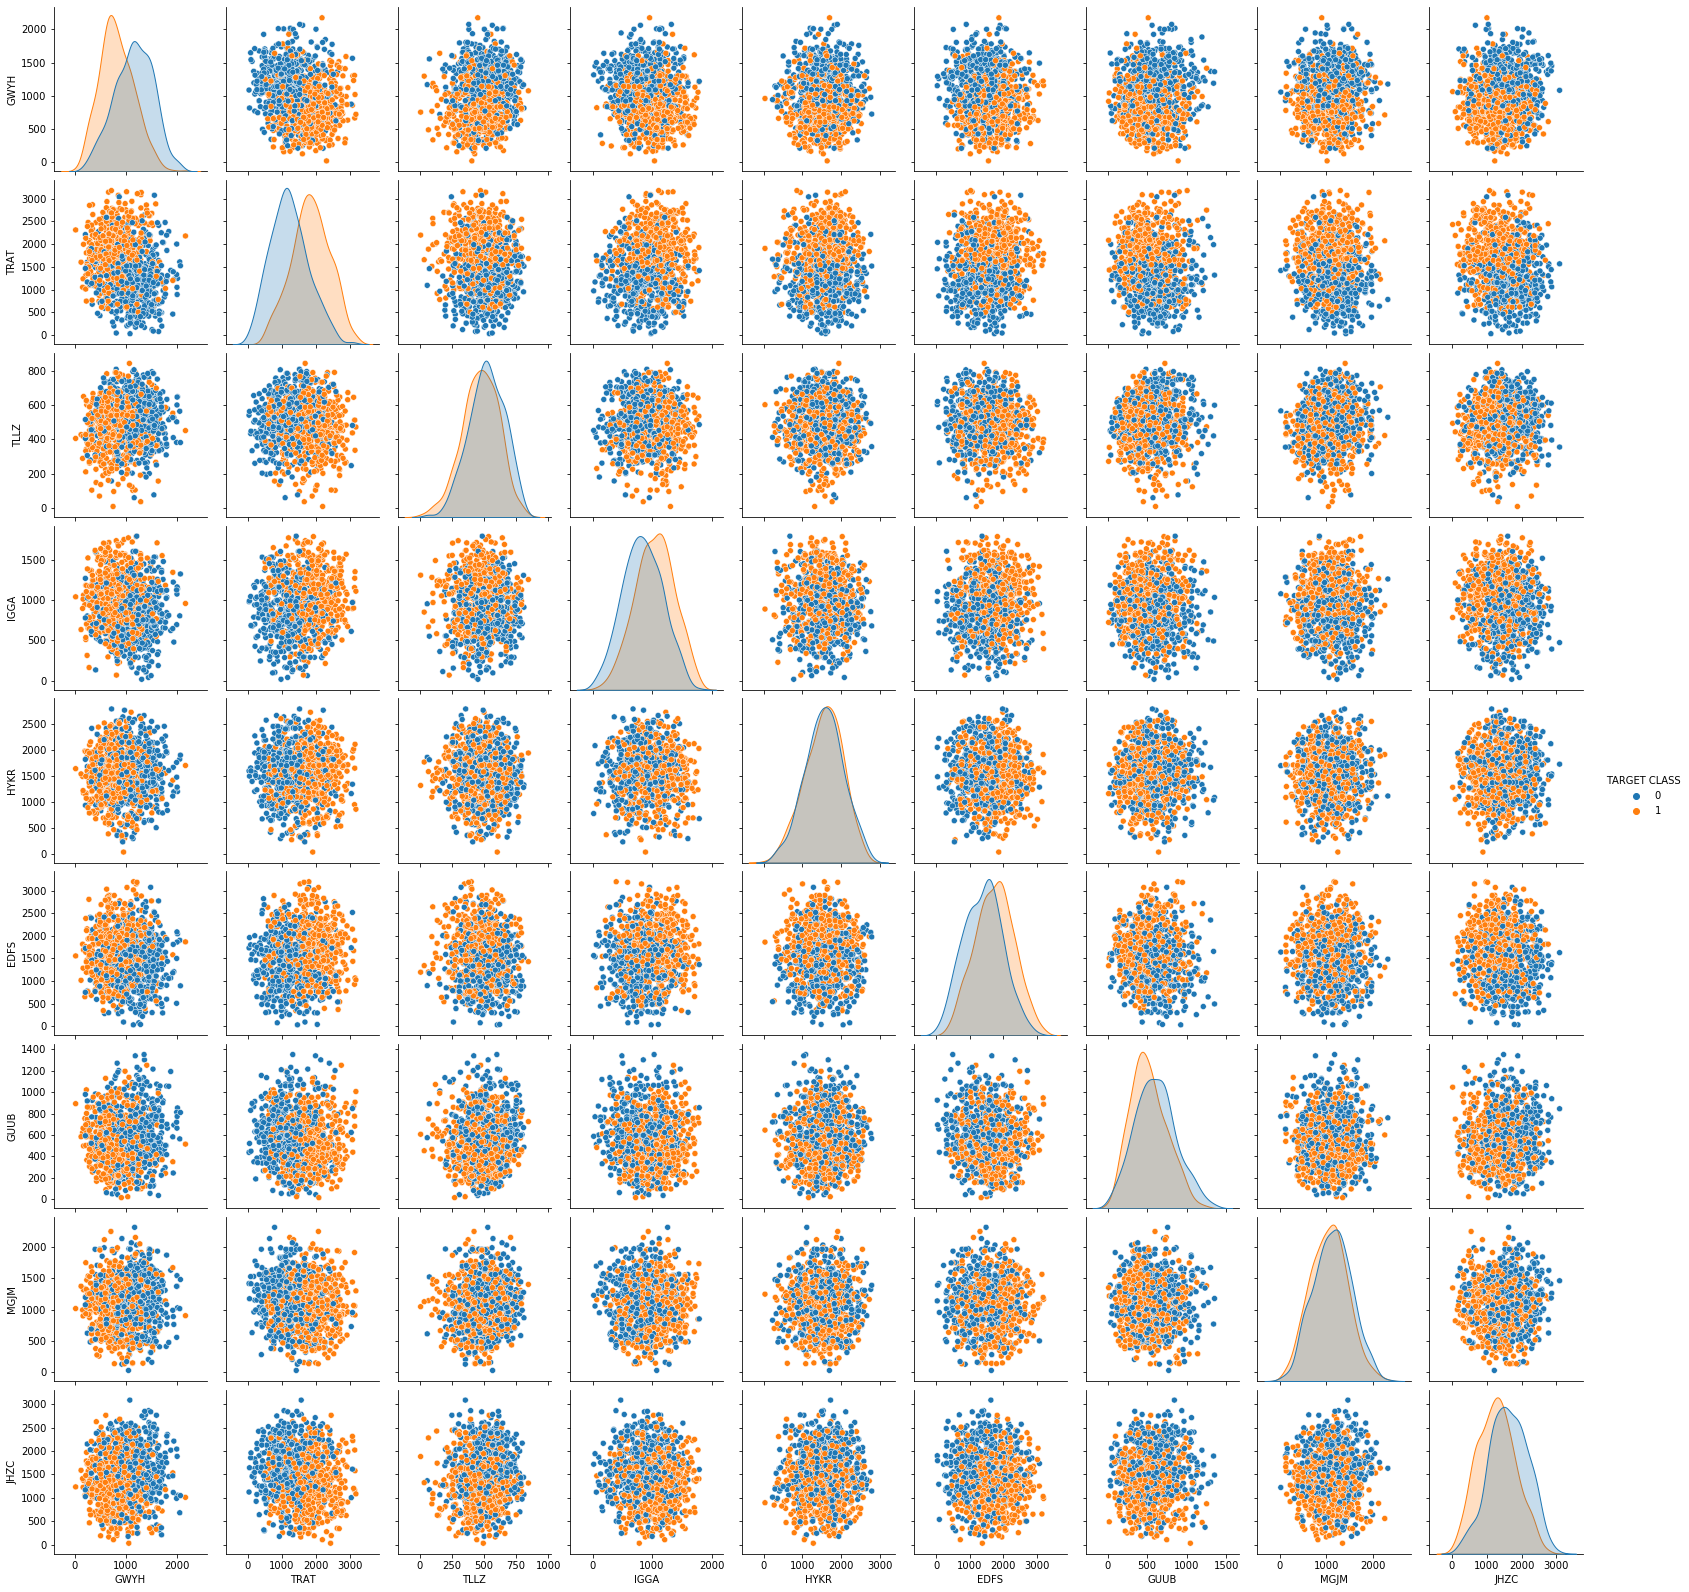

In [4]:
sns.pairplot(df, hue='TARGET CLASS')

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler = StandardScaler()

In [8]:
df.columns

Index(['GWYH', 'TRAT', 'TLLZ', 'IGGA', 'HYKR', 'EDFS', 'GUUB', 'MGJM', 'JHZC',
       'TARGET CLASS'],
      dtype='object')

In [10]:
scaler.fit(df.drop('TARGET CLASS', axis=1))

StandardScaler()

In [14]:
scaler_features=scaler.transform(df.drop('TARGET CLASS', axis=1))

In [13]:
#scaler_features

In [16]:
df_scaled = pd.DataFrame(scaler_features, columns=df.columns[:-1])

In [17]:
df_scaled.head(2)

,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546


In [18]:
df_scaled.columns

Index(['GWYH', 'TRAT', 'TLLZ', 'IGGA', 'HYKR', 'EDFS', 'GUUB', 'MGJM', 'JHZC'], dtype='object')

In [20]:
X = df_scaled[['GWYH', 'TRAT', 'TLLZ', 'IGGA', 'HYKR', 'EDFS', 'GUUB', 'MGJM', 'JHZC']]
y= df['TARGET CLASS']


In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [24]:
knn=KNeighborsClassifier(n_neighbors=1)

In [25]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [26]:
predictions = knn.predict(X_test)

In [27]:
from sklearn.metrics import classification_report, confusion_matrix

In [28]:
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

[[118  45]
 [ 44 123]]


              precision    recall  f1-score   support

           0       0.73      0.72      0.73       163
           1       0.73      0.74      0.73       167

    accuracy                           0.73       330
   macro avg       0.73      0.73      0.73       330
weighted avg       0.73      0.73      0.73       330



In [29]:
error_rate=[]

In [30]:
for i in range(1,40):
    knn_i=KNeighborsClassifier(n_neighbors=i)
    knn_i.fit(X_train,y_train)
    pred_i = knn_i.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

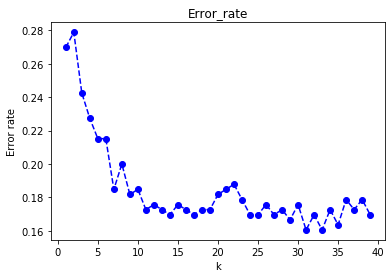

In [36]:
plt.figure()
plt.plot(range(1,40), error_rate, marker='o', color='blue', linestyle='dashed')
plt.title('Error_rate')
plt.xlabel('k')
plt.ylabel('Error rate')
plt.show()

In [38]:
knn_31=KNeighborsClassifier(n_neighbors=31)
knn_31.fit(X_train,y_train)
pred_31 = knn_31.predict(X_test)

In [39]:
print(confusion_matrix(y_test, pred_31))
print('\n')
print(classification_report(y_test, pred_31))

[[140  23]
 [ 30 137]]


              precision    recall  f1-score   support

           0       0.82      0.86      0.84       163
           1       0.86      0.82      0.84       167

    accuracy                           0.84       330
   macro avg       0.84      0.84      0.84       330
weighted avg       0.84      0.84      0.84       330

